In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import os
import cv2
import time
from zipfile import ZipFile
from PIL import Image
import io

Link: dataset: https://drive.google.com/drive/folders/1e6D-5uMvumHGWkLI4YOD6VDkDEa4xoJi?usp=sharing

In [5]:
with ZipFile('/content/sample_data/animal.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
dataset_path = "/data/animal/animal"
class_label = []
_dict = {'cat': 0,
         'dog': 1,
         'wild': 2}
for train_test in os.listdir(dataset_path):
    if train_test == 'train':
        t = 1
    else:
        t = 0
    all_classes = os.listdir(dataset_path+ '/' + train_test)
    for _class in all_classes:
        all_img = os.listdir(dataset_path+ '/' + train_test + '/' + _class)
        for img in all_img[:200]:
            class_label.append((t, _dict[_class], dataset_path+ '/' + train_test + '/' + _class + '/' + img ))

In [5]:
df = pd.DataFrame(data=class_label, columns=['Train', 'Label', 'image'])
df.to_csv('groundtruth.csv', index=False)
print(df)

     Train  Label                                              image
0        0      0  C:/Users/Admin/Documents/LuanSu/CNTT/NCKH_2023...
1        0      0  C:/Users/Admin/Documents/LuanSu/CNTT/NCKH_2023...
2        0      0  C:/Users/Admin/Documents/LuanSu/CNTT/NCKH_2023...
3        0      0  C:/Users/Admin/Documents/LuanSu/CNTT/NCKH_2023...
4        0      0  C:/Users/Admin/Documents/LuanSu/CNTT/NCKH_2023...
..     ...    ...                                                ...
700      1      2  C:/Users/Admin/Documents/LuanSu/CNTT/NCKH_2023...
701      1      2  C:/Users/Admin/Documents/LuanSu/CNTT/NCKH_2023...
702      1      2  C:/Users/Admin/Documents/LuanSu/CNTT/NCKH_2023...
703      1      2  C:/Users/Admin/Documents/LuanSu/CNTT/NCKH_2023...
704      1      2  C:/Users/Admin/Documents/LuanSu/CNTT/NCKH_2023...

[705 rows x 3 columns]


In [6]:
x_train = []
x_test = []

y_train = []
y_test = []

for i in range(len(df)):
    img = cv2.imread(df['image'][i])
    img = cv2.resize(img, (224, 224))
    img = np.array(img)
    img = img.astype('float32')
    if df['Train'][i] == 1:
        x_train.append(img)
        y_train.append(df['Label'][i])
    else:
        x_test.append(img)
        y_test.append(df['Label'][i])

In [9]:
x_train = tf.constant(x_train)
x_test = tf.constant(x_test)

In [10]:
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [12]:
x_train[1]

array([[[143., 110., 101.],
        [141., 109., 100.],
        [139., 108.,  99.],
        ...,
        [225., 224., 226.],
        [225., 224., 226.],
        [225., 224., 226.]],

       [[142., 109., 100.],
        [141., 109.,  99.],
        [139., 108.,  99.],
        ...,
        [225., 224., 226.],
        [225., 224., 226.],
        [225., 224., 226.]],

       [[141., 108.,  99.],
        [140., 108.,  99.],
        [138., 107.,  98.],
        ...,
        [226., 225., 227.],
        [226., 225., 227.],
        [226., 225., 227.]],

       ...,

       [[147., 121., 109.],
        [148., 122., 110.],
        [149., 123., 111.],
        ...,
        [219., 217., 217.],
        [218., 216., 216.],
        [218., 216., 216.]],

       [[147., 121., 109.],
        [147., 122., 110.],
        [149., 123., 111.],
        ...,
        [218., 216., 216.],
        [218., 215., 215.],
        [217., 215., 215.]],

       [[147., 121., 109.],
        [148., 122., 110.],
        [149., 1

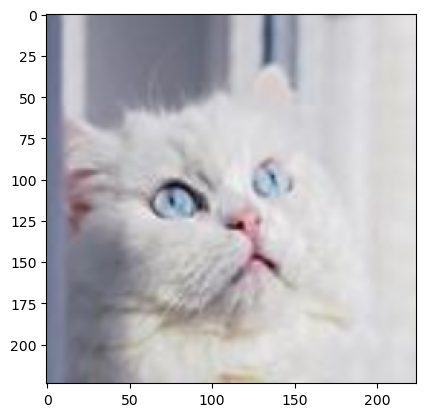

In [15]:
conv_img = cv2.cvtColor(np.array(x_train[1]).astype(np.uint8), cv2.COLOR_BGR2RGB) # Chuyen thu tu mau tu BGR (CV2) -> RGB (matplotlib)
plt.imshow(conv_img)

In [17]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
inputs = layers.Input(shape=(224, 224, 3))
outputs = ResNet50(include_top=True, weights=None, classes=10)(inputs)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 10)                23608202  
                                                                 
Total params: 23608202 (90.06 MB)
Trainable params: 23555082 (89.86 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [18]:
hist = model.fit(x_train, y_train, epochs=10, verbose=2)

Epoch 1/10
19/19 - 490s - loss: 1.6570 - accuracy: 0.4100 - 490s/epoch - 26s/step
Epoch 2/10
19/19 - 456s - loss: 0.8985 - accuracy: 0.5467 - 456s/epoch - 24s/step
Epoch 3/10
19/19 - 449s - loss: 0.8820 - accuracy: 0.5833 - 449s/epoch - 24s/step
Epoch 4/10
19/19 - 453s - loss: 0.8235 - accuracy: 0.5933 - 453s/epoch - 24s/step
Epoch 5/10
19/19 - 455s - loss: 0.7401 - accuracy: 0.6567 - 455s/epoch - 24s/step
Epoch 6/10
19/19 - 460s - loss: 0.6909 - accuracy: 0.6717 - 460s/epoch - 24s/step
Epoch 7/10
19/19 - 445s - loss: 0.5740 - accuracy: 0.7950 - 445s/epoch - 23s/step
Epoch 8/10
19/19 - 456s - loss: 0.7434 - accuracy: 0.7367 - 456s/epoch - 24s/step
Epoch 9/10
19/19 - 447s - loss: 0.7203 - accuracy: 0.6750 - 447s/epoch - 24s/step
Epoch 10/10
19/19 - 450s - loss: 0.5554 - accuracy: 0.7817 - 450s/epoch - 24s/step


In [19]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

4/4 [==============================] - 24s 4s/step - loss: 1.2127 - accuracy: 0.4476
Test loss 1.2127, accuracy 44.76%


In [23]:
hist.history

{'loss': [1.657033920288086,
  0.8984779119491577,
  0.8819873929023743,
  0.823509931564331,
  0.7400584816932678,
  0.69087815284729,
  0.5740337371826172,
  0.7434125542640686,
  0.7203086614608765,
  0.5553581118583679],
 'accuracy': [0.4099999964237213,
  0.54666668176651,
  0.5833333134651184,
  0.5933333039283752,
  0.6566666960716248,
  0.67166668176651,
  0.7950000166893005,
  0.7366666793823242,
  0.675000011920929,
  0.7816666960716248]}

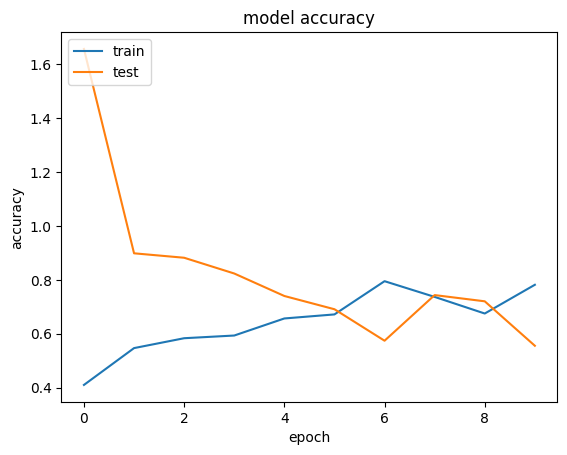

In [25]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
model.save("resnet_animal.keras")

In [ ]:
# Convert Keras model to TF Lite format.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model as file
f = open('lenet5.tflite', "wb")
f.write(tflite_model)
f.close()

In [62]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import classification_report


# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Predict the labels of digit images in our test dataset.
predictions = model.predict(x_test[:500])

# As the model output 10 float representing the probability of the input image
# being a digit from 0 to 9, we need to find the largest probability value
# to find out which digit the model predicts to be most likely in the image.
predictions = np.argmax(predictions, axis=1)
y = np.argmax(y_test, axis=1)
print(predictions)
_class = {0: 'cat',
          1: 'dog',
          2: 'wild'}
# clasifies = []
# for i in range(len(predictions)):
#   clasifies.append(_class[predictions[i]])
# Then plot 100 random test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.

plt.figure(figsize=(18, 18))

for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_index = random.randint(0, len(predictions))
    img_path = x_test[image_index]
#     print(img_path)
#     print(len(img_path.shape)) // return 3
    if(len(img_path.shape) == 3):
        plt.imshow(np.squeeze(np.array(img_path).astype(int)), cmap=plt.cm.gray)
    elif(len(img_path.shape) == 2):
        conv_img = cv2.cvtColor(np.array(x_train[1]).astype(np.uint8), cv2.COLOR_BGR2RGB) # Chuyen thu tu mau tu BGR (CV2) -> RGB (matplotlib)
        plt.imshow(conv_img)
    else:
        print("Higher dimensional data")
    ax.xaxis.label.set_color(get_label_color(predictions[image_index],\
                                           int(y[image_index])))
    plt.xlabel('Predict: '+ _class[predictions[image_index]])
plt.show()

Output hidden; open in https://colab.research.google.com to view.